# Machine Learning Analysis

<div class="alert alert-block alert-info">
We will develop some Machine Learning techniques with our data in order to try to classify the samples in FastSurfer/FreeSurfer.
If FastSurfer actually get results similar to FreeSurfer, we will expect some metrics such as 'accuracy' to be very low. Otherwise, we will get good metrics.
At first, we will include all the regions in the data. We expect the accuracy to be high because there are some regions in FastSurfer whose values are not distributed like they are in FreeSurfer.
Afterwards, we will remove those regions that are not similar in both oftwares, so we will expect lower accuracies.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import plot_confusion_matrix
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
import os
import pathlib

In [2]:
concat_df = pd.read_pickle('all_stats_f7.pkl')
statsFastSurfer = pd.read_pickle('statsFastSurfer_f7.pkl')
statsFreeSurfer = pd.read_pickle('statsFreeSurfer_f7.pkl')

In [3]:
concat_df.head()

3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
subject Software                                                               
10010   FastSurfer          1252.3         1545.0            0.0     23478.7   
        FreeSurfer7         1160.4         1395.3            0.0     23388.7   
10011   FastSurfer          1395.7         1464.9            0.0     20967.4   
        FreeSurfer7         1243.8         1341.1            0.0     20558.4   
10012   FastSurfer          1373.6         1385.9            0.0     21221.4   

                      BrainSegVol  BrainSegVolNotVent  CC_Anterior  \
subject Software                                                     
10010   FastSurfer   1.130872e+06        1.103652e+06       1159.2   
        FreeSurfer7  1.140177e+06        1.113767e+06        723.8   
10011   FastSurfer   1.013429e+06        9.930320e+05        703.7   
        FreeSurfer7  1.006308e+06        9.865598e+05        520.4   
10012   FastSurfer   1.074364e+06        1.042517e+06        981.2   

                     CC_Central  CC_Mid_Anterior  CC_Mid_Posterior  ...  \
subject Software                                                    ...   
10010   FastSurfer        914.5            541.8             550.7  ...   
        FreeSurfer7       360.5            402.9             395.7  ...   
10011   FastSurfer        339.2            350.5             329.4  ...   
        FreeSurfer7       256.3            260.9             253.9  ...   
10012   FastSurfer        712.4            388.5             462.9  ...   

                     SubCortGrayVol  SupraTentorialVol  \
subject Software                                         
10010   FastSurfer     58464.000000      985329.127032   
        FreeSurfer7    58854.093750      990306.421875   
10011   FastSurfer     50086.000000      895651.319629   
        FreeSurfer7    51836.203125      881055.562500   
10012   FastSurfer     51157.000000      958722.844341   

                     SupraTentorialVolNotVent   TotalGrayVol  \
subject Software                                               
10010   FastSurfer              962081.127032  606493.534351   
        FreeSurfer7             963896.625000  620161.819810   
10011   FastSurfer              879223.319629  579274.765061   
        FreeSurfer7             861307.171875  579510.277307   
10012   FastSurfer              930585.844341  584596.562471   

                     WM-hypointensities  lhCerebralWhiteMatterVol  \
subject Software                                                    
10010   FastSurfer               2402.2             235160.339637   
        FreeSurfer7              1997.8             233609.484375   
10011   FastSurfer               1071.5             195681.058639   
        FreeSurfer7              1167.6             189834.468750   
10012   FastSurfer               1390.8             215145.144558   

                       lhCortexVol  non-WM-hypointensities  \
subject Software                                             
10010   FastSurfer   220400.716587                     0.0   
        FreeSurfer7  223312.769133                    12.3   
10011   FastSurfer   218365.416744                     0.0   
        FreeSurfer7  213108.455452                     4.0   
10012   FastSurfer   219214.854598                     0.0   

                     rhCerebralWhiteMatterVol    rhCortexVol  
subject Software                                              
10010   FastSurfer              231447.253043  215464.817764  
        FreeSurfer7             228810.234375  220056.003802  
10011   FastSurfer              196481.495929  217480.348316  
        FreeSurfer7             191989.828125  214773.196854  
10012   FastSurfer              218237.137312  225925.707873  

[5 rows x 55 columns]

## Preprocessing

In [4]:
concat_df.reset_index(inplace=True)

In [5]:
concat_df.columns

Index(['subject', 'Software', '3rd-Ventricle', '4th-Ventricle',
       '5th-Ventricle', 'Brain-Stem', 'BrainSegVol', 'BrainSegVolNotVent',
       'CC_Anterior', 'CC_Central', 'CC_Mid_Anterior', 'CC_Mid_Posterior',
       'CC_Posterior', 'CSF', 'CerebralWhiteMatterVol', 'Left-Accumbens-area',
       'Left-Amygdala', 'Left-Caudate', 'Left-Cerebellum-Cortex',
       'Left-Cerebellum-White-Matter', 'Left-Hippocampus', 'Left-Inf-Lat-Vent',
       'Left-Lateral-Ventricle', 'Left-Pallidum', 'Left-Putamen',
       'Left-VentralDC', 'Left-WM-hypointensities', 'Left-choroid-plexus',
       'Left-non-WM-hypointensities', 'Left-vessel', 'MaskVol', 'Optic-Chiasm',
       'Right-Accumbens-area', 'Right-Amygdala', 'Right-Caudate',
       'Right-Cerebellum-Cortex', 'Right-Cerebellum-White-Matter',
       'Right-Hippocampus', 'Right-Inf-Lat-Vent', 'Right-Lateral-Ventricle',
       'Right-Pallidum', 'Right-Putamen', 'Right-VentralDC',
       'Right-WM-hypointensities', 'Right-choroid-plexus',
       'Ri

<div class="alert alert-block alert-info">
    
We will replace the output (FastSurfer and FreeSurfer) for 0 and 1, respectively

In [6]:
concat_df['Software'].replace(to_replace='FastSurfer', value=0, inplace=True)
concat_df['Software'].replace(to_replace='FreeSurfer7', value=1, inplace=True)

In [7]:
concat_df.head()

subject  Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
0    10010         0         1252.3         1545.0            0.0     23478.7   
1    10010         1         1160.4         1395.3            0.0     23388.7   
2    10011         0         1395.7         1464.9            0.0     20967.4   
3    10011         1         1243.8         1341.1            0.0     20558.4   
4    10012         0         1373.6         1385.9            0.0     21221.4   

    BrainSegVol  BrainSegVolNotVent  CC_Anterior  CC_Central  ...  \
0  1.130872e+06        1.103652e+06       1159.2       914.5  ...   
1  1.140177e+06        1.113767e+06        723.8       360.5  ...   
2  1.013429e+06        9.930320e+05        703.7       339.2  ...   
3  1.006308e+06        9.865598e+05        520.4       256.3  ...   
4  1.074364e+06        1.042517e+06        981.2       712.4  ...   

   SubCortGrayVol  SupraTentorialVol  SupraTentorialVolNotVent   TotalGrayVol  \
0    58464.000000      985329.127032             962081.127032  606493.534351   
1    58854.093750      990306.421875             963896.625000  620161.819810   
2    50086.000000      895651.319629             879223.319629  579274.765061   
3    51836.203125      881055.562500             861307.171875  579510.277307   
4    51157.000000      958722.844341             930585.844341  584596.562471   

   WM-hypointensities  lhCerebralWhiteMatterVol    lhCortexVol  \
0              2402.2             235160.339637  220400.716587   
1              1997.8             233609.484375  223312.769133   
2              1071.5             195681.058639  218365.416744   
3              1167.6             189834.468750  213108.455452   
4              1390.8             215145.144558  219214.854598   

   non-WM-hypointensities  rhCerebralWhiteMatterVol    rhCortexVol  
0                     0.0             231447.253043  215464.817764  
1                    12.3             228810.234375  220056.003802  
2                     0.0             196481.495929  217480.348316  
3                     4.0             191989.828125  214773.196854  
4                     0.0             218237.137312  225925.707873  

[5 rows x 57 columns]

In [8]:
concat_df.drop('subject',axis=1, inplace=True)

In [9]:
concat_df.head()

Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle  Brain-Stem  \
0         0         1252.3         1545.0            0.0     23478.7   
1         1         1160.4         1395.3            0.0     23388.7   
2         0         1395.7         1464.9            0.0     20967.4   
3         1         1243.8         1341.1            0.0     20558.4   
4         0         1373.6         1385.9            0.0     21221.4   

    BrainSegVol  BrainSegVolNotVent  CC_Anterior  CC_Central  CC_Mid_Anterior  \
0  1.130872e+06        1.103652e+06       1159.2       914.5            541.8   
1  1.140177e+06        1.113767e+06        723.8       360.5            402.9   
2  1.013429e+06        9.930320e+05        703.7       339.2            350.5   
3  1.006308e+06        9.865598e+05        520.4       256.3            260.9   
4  1.074364e+06        1.042517e+06        981.2       712.4            388.5   

   ...  SubCortGrayVol  SupraTentorialVol  SupraTentorialVolNotVent  \
0  ...    58464.000000      985329.127032             962081.127032   
1  ...    58854.093750      990306.421875             963896.625000   
2  ...    50086.000000      895651.319629             879223.319629   
3  ...    51836.203125      881055.562500             861307.171875   
4  ...    51157.000000      958722.844341             930585.844341   

    TotalGrayVol  WM-hypointensities  lhCerebralWhiteMatterVol    lhCortexVol  \
0  606493.534351              2402.2             235160.339637  220400.716587   
1  620161.819810              1997.8             233609.484375  223312.769133   
2  579274.765061              1071.5             195681.058639  218365.416744   
3  579510.277307              1167.6             189834.468750  213108.455452   
4  584596.562471              1390.8             215145.144558  219214.854598   

   non-WM-hypointensities  rhCerebralWhiteMatterVol    rhCortexVol  
0                     0.0             231447.253043  215464.817764  
1                    12.3             228810.234375  220056.003802  
2                     0.0             196481.495929  217480.348316  
3                     4.0             191989.828125  214773.196854  
4                     0.0             218237.137312  225925.707873  

[5 rows x 56 columns]

In [10]:
concat_df.shape

(2872, 56)

In [11]:
concat_df.describe()

Software  3rd-Ventricle  4th-Ventricle  5th-Ventricle    Brain-Stem  \
count  2872.000000    2872.000000    2872.000000    2872.000000   2872.000000   
mean      0.500000    1300.351219    1816.955501       0.003308  20838.188649   
std       0.500087     474.673049     484.123205       0.071112   2219.823495   
min       0.000000     460.800000     663.400000       0.000000  14782.600000   
25%       0.000000     956.325000    1474.025000       0.000000  19319.725000   
50%       0.500000    1203.900000    1735.950000       0.000000  20677.050000   
75%       1.000000    1535.775000    2091.175000       0.000000  22340.650000   
max       1.000000    4341.000000    6076.800000       2.600000  28267.700000   

        BrainSegVol  BrainSegVolNotVent  CC_Anterior   CC_Central  \
count  2.872000e+03        2.872000e+03  2872.000000  2872.000000   
mean   1.073514e+06        1.045736e+06   782.675418   482.010724   
std    1.024641e+05        9.907330e+04   194.663040   184.218431   
min    7.908040e+05        7.660560e+05   342.700000   183.100000   
25%    9.990611e+05        9.747271e+05   636.925000   332.550000   
50%    1.067418e+06        1.040348e+06   752.800000   417.050000   
75%    1.141730e+06        1.113618e+06   902.625000   621.825000   
max    1.387998e+06        1.345575e+06  1524.800000  1149.200000   

       CC_Mid_Anterior  ...  SubCortGrayVol  SupraTentorialVol  \
count      2872.000000  ...     2872.000000       2.872000e+03   
mean        430.631233  ...    52698.018184       9.468776e+05   
std         139.888420  ...     4874.512980       9.437019e+04   
min         173.700000  ...    38359.000000       6.828178e+05   
25%         332.900000  ...    49267.640625       8.782834e+05   
50%         397.500000  ...    52492.500000       9.417323e+05   
75%         486.450000  ...    55957.500000       1.008869e+06   
max        1115.600000  ...    68872.000000       1.250859e+06   

       SupraTentorialVolNotVent   TotalGrayVol  WM-hypointensities  \
count              2.872000e+03    2872.000000         2872.000000   
mean               9.212715e+05  594334.671240         2419.618036   
std                9.105463e+04   50689.437109         2177.008228   
min                6.602833e+05  447401.519428          632.300000   
25%                8.562049e+05  558946.347840         1400.975000   
50%                9.156611e+05  591606.855115         1838.000000   
75%                9.816909e+05  626134.982378         2588.825000   
max                1.190503e+06  778846.692866        30672.100000   

       lhCerebralWhiteMatterVol    lhCortexVol  non-WM-hypointensities  \
count               2872.000000    2872.000000             2872.000000   
mean              213471.705353  220702.430735                0.359540   
std                25554.890806   20126.365974                1.924909   
min               144264.434023  163260.322720                0.000000   
25%               194187.170620  206624.704763                0.000000   
50%               211869.729818  219544.352939                0.000000   
75%               231269.248965  233360.530574                0.000000   
max               303838.387755  297953.687467               35.800000   

       rhCerebralWhiteMatterVol    rhCortexVol  
count               2872.000000    2872.000000  
mean              213348.384161  220901.033588  
std                25487.915946   20202.610236  
min               143647.918584  160374.527736  
25%               194447.915265  207148.259134  
50%               212030.854925  219596.948126  
75%               230830.154656  233788.173761  
max               304417.018195  302706.476319  

[8 rows x 56 columns]

## Correlation map in FastSurfer stats

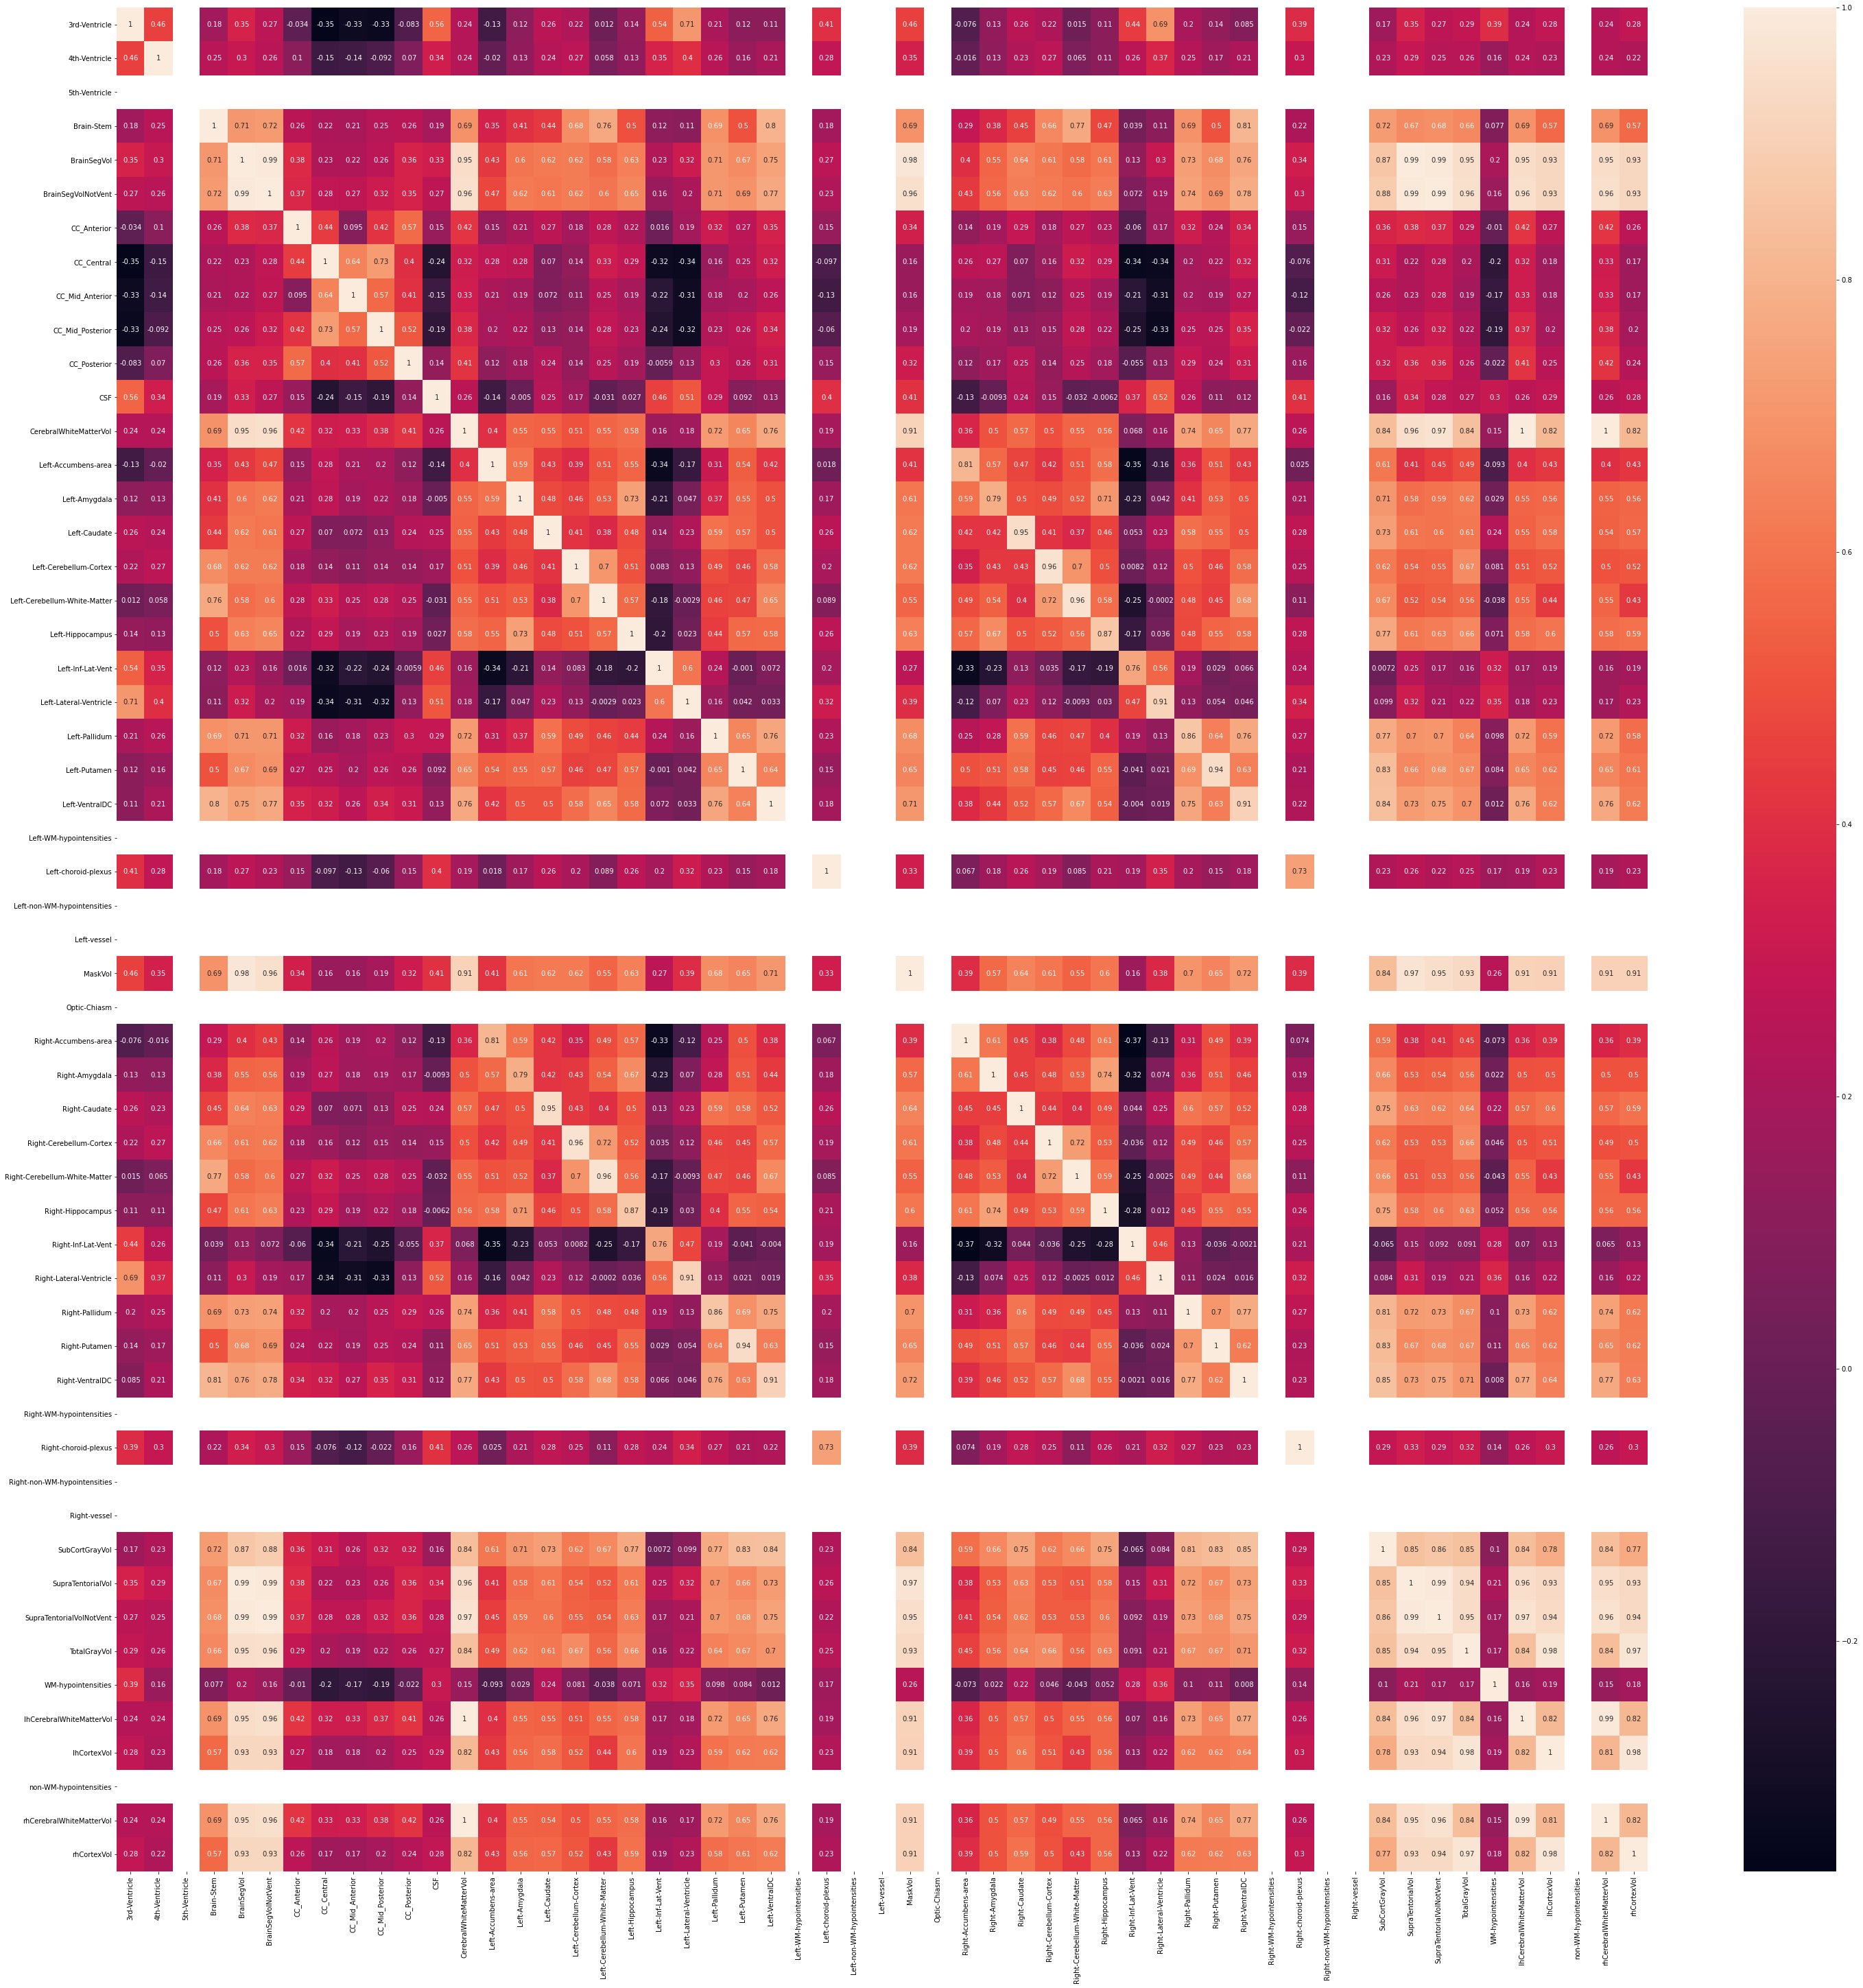

In [12]:
#Correlation map
f, ax = plt.subplots(figsize=(50, 50))
corr = statsFastSurfer.corr()
sns.heatmap(corr,annot=True,
            xticklabels=corr.columns.values,
            yticklabels=corr.columns.values)
plt.savefig('corr_map_FastSurfer.png')
plt.show()

## Catboost Classifier with all the regions included

In [138]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities','CerebralWhiteMatterVol',
                            'rhCerebralWhiteMatterVol','lhCerebralWhiteMatterVol','TotalGrayVol',
                           'MaskVol'])

#### Split in train and test

In [139]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

#### Split in train and validation

In [140]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [141]:
print(x_train.shape)
print(x_test.shape)
print(x_val.shape)

(1837, 41)
(575, 41)
(460, 41)


Learning rate set to 0.175419
0:	learn: 0.4650723	test: 0.4663667	best: 0.4663667 (0)	total: 3.51ms	remaining: 348ms
1:	learn: 0.3277656	test: 0.3290167	best: 0.3290167 (1)	total: 6.57ms	remaining: 322ms
2:	learn: 0.2549670	test: 0.2624016	best: 0.2624016 (2)	total: 9.27ms	remaining: 300ms
3:	learn: 0.2017453	test: 0.2162128	best: 0.2162128 (3)	total: 12ms	remaining: 287ms
4:	learn: 0.1711407	test: 0.1903733	best: 0.1903733 (4)	total: 15.5ms	remaining: 294ms
5:	learn: 0.1496828	test: 0.1738919	best: 0.1738919 (5)	total: 18.1ms	remaining: 284ms
6:	learn: 0.1363463	test: 0.1627666	best: 0.1627666 (6)	total: 21ms	remaining: 280ms
7:	learn: 0.1226457	test: 0.1540082	best: 0.1540082 (7)	total: 23.8ms	remaining: 274ms
8:	learn: 0.1101508	test: 0.1414905	best: 0.1414905 (8)	total: 26.6ms	remaining: 269ms
9:	learn: 0.1002388	test: 0.1348896	best: 0.1348896 (9)	total: 29.4ms	remaining: 264ms
10:	learn: 0.0920914	test: 0.1276236	best: 0.1276236 (10)	total: 32.1ms	remaining: 260ms
11:	learn: 0.08

{'learn': {'Logloss': 0.008927927240445423}, 'validation': {'Logloss': 0.07190228337826936}}
[[276.   7.]
 [  5. 287.]]


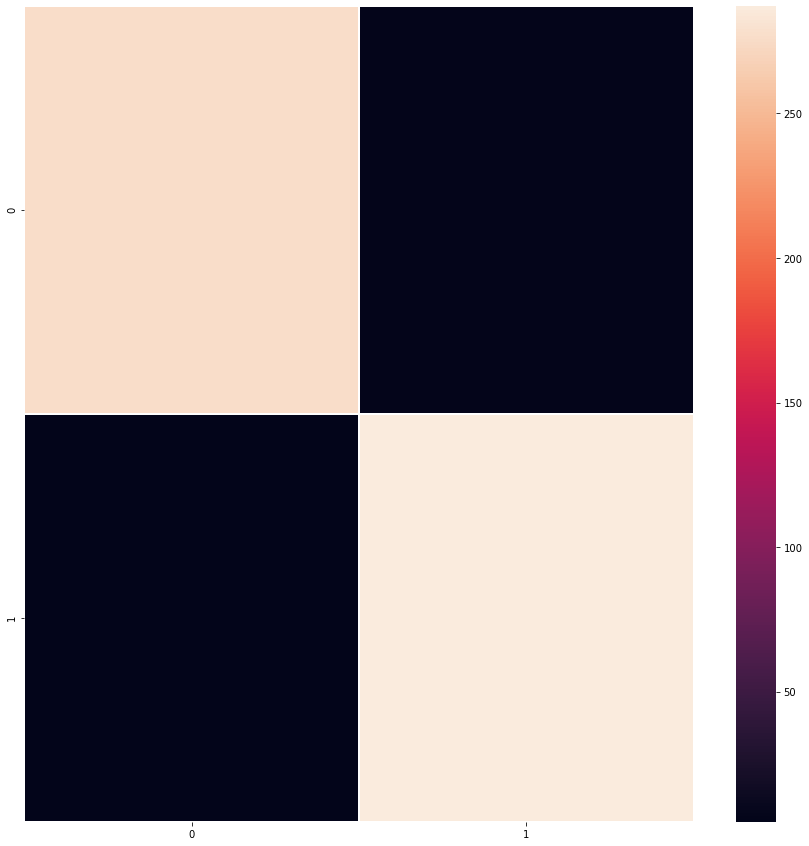

catboost Acc :  0.9791304347826087


In [142]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix
from sklearn.metrics import confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=100,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)

print(cm)

predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Acurracy is 100%, so, when we include all the regions in the data, our model is able to classify each subject in the correct Software

In [145]:
import shap
shap.initjs()

In [146]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

<Figure size 2160x1440 with 0 Axes>

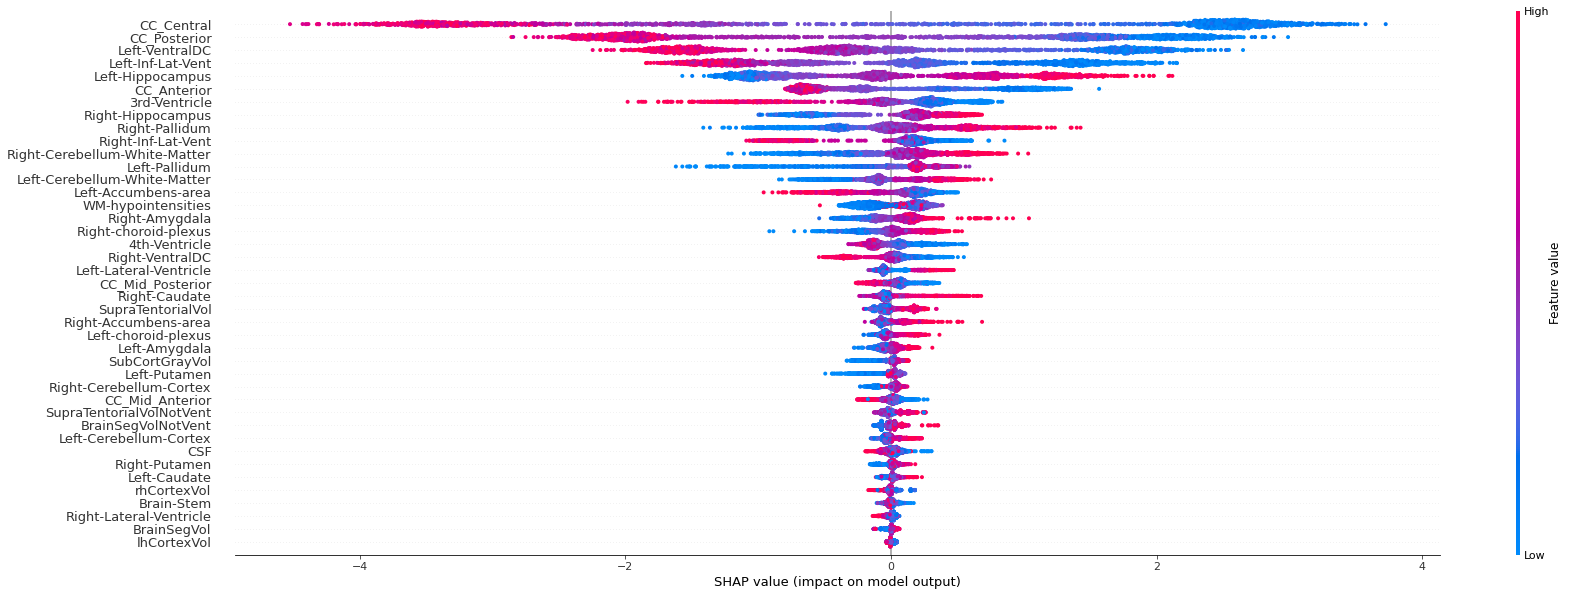

In [148]:
plt.figure(figsize=(30, 20))
fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values, features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,plot_size=(27, 10),show=False, )
plt.savefig('CatBoostALL.png')

In [94]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities','CerebralWhiteMatterVol',
                            'rhCerebralWhiteMatterVol','lhCerebralWhiteMatterVol','TotalGrayVol',
                            'MaskVol'])
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [95]:
print(x_train.shape)
print(y_train.shape)

(2297, 41)
(2297,)


In [109]:
from sklearn.feature_selection import SelectKBest, chi2, mutual_info_classif


### Mutual Information for feature selection

Text(0.5, 1.0, 'Información Mutua')

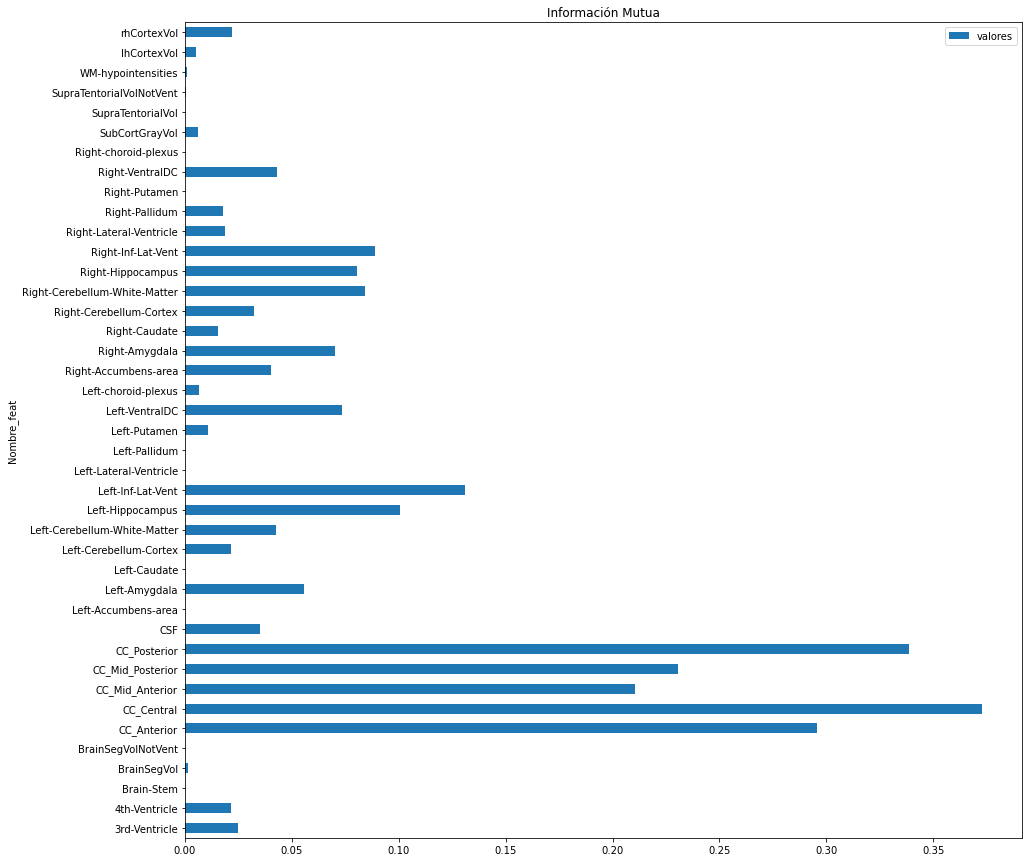

In [112]:
bestfeatures_MI = SelectKBest(score_func=mutual_info_classif, k=41)
fit_MI = bestfeatures_MI.fit(x_train, y_train)

# gráfico de barras utilizando matplotlib
df = pd.DataFrame({'Nombre_feat':x.columns, 'valores':fit_MI.scores_})
plt.rcParams["figure.figsize"] = (15, 15)
ax = df.plot.barh(x='Nombre_feat', y='valores', rot=0)
plt.savefig('inf_mutua.jpg')
plt.title("Información Mutua")

## Catboost Classifier with some regions dropped

We have removed those regions that, visually, differ so much from the other Software and also those that haven't been segmentated by the Softwares

In [163]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','Left-Inf-Lat-Vent','Left-VentralDC',
                            'MaskVol','Right-Inf-Lat-Vent','Right-VentralDC','Left-Hippocampus',
                            'Right-Hippocampus','Right-Cerebellum-White-Matter','Left-Cerebellum-White-Matter',
                            'Right-Amygdala','Left-Amygdala',
                            '5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

#### Split in train and test

In [164]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

#### Split in train and validation

In [165]:
x_train, x_val, y_train, y_val = train_test_split(x_train, y_train, test_size=0.2, random_state=42,shuffle=True)

In [166]:
print(x_train.shape)
print(x_test.shape)

(1837, 30)
(575, 30)


Learning rate set to 0.175419
0:	learn: 0.6494741	test: 0.6640646	best: 0.6640646 (0)	total: 3.11ms	remaining: 308ms
1:	learn: 0.6313807	test: 0.6508057	best: 0.6508057 (1)	total: 5.71ms	remaining: 280ms
2:	learn: 0.6054468	test: 0.6363548	best: 0.6363548 (2)	total: 8.34ms	remaining: 270ms
3:	learn: 0.5836577	test: 0.6235186	best: 0.6235186 (3)	total: 11ms	remaining: 263ms
4:	learn: 0.5690832	test: 0.6195133	best: 0.6195133 (4)	total: 13.9ms	remaining: 264ms
5:	learn: 0.5537325	test: 0.6121947	best: 0.6121947 (5)	total: 17.4ms	remaining: 273ms
6:	learn: 0.5404548	test: 0.6061756	best: 0.6061756 (6)	total: 20ms	remaining: 266ms
7:	learn: 0.5260569	test: 0.5986604	best: 0.5986604 (7)	total: 22.6ms	remaining: 260ms
8:	learn: 0.5136209	test: 0.5945018	best: 0.5945018 (8)	total: 25.3ms	remaining: 256ms
9:	learn: 0.5018767	test: 0.5893567	best: 0.5893567 (9)	total: 27.9ms	remaining: 251ms
10:	learn: 0.4941277	test: 0.5865601	best: 0.5865601 (10)	total: 30.9ms	remaining: 250ms
11:	learn: 0.48

94:	learn: 0.1989874	test: 0.5776709	best: 0.5515096 (29)	total: 265ms	remaining: 13.9ms
95:	learn: 0.1977297	test: 0.5779664	best: 0.5515096 (29)	total: 268ms	remaining: 11.1ms
96:	learn: 0.1955801	test: 0.5770134	best: 0.5515096 (29)	total: 270ms	remaining: 8.35ms
97:	learn: 0.1930162	test: 0.5762267	best: 0.5515096 (29)	total: 273ms	remaining: 5.56ms
98:	learn: 0.1912466	test: 0.5765033	best: 0.5515096 (29)	total: 275ms	remaining: 2.78ms
99:	learn: 0.1882432	test: 0.5760063	best: 0.5515096 (29)	total: 277ms	remaining: 0us
bestTest = 0.5515095586
bestIteration = 29
Shrink model to first 30 iterations.
{'learn': {'Logloss': 0.18824323675979007}, 'validation': {'Logloss': 0.5515095586362092}}
[[207.  76.]
 [ 87. 205.]]


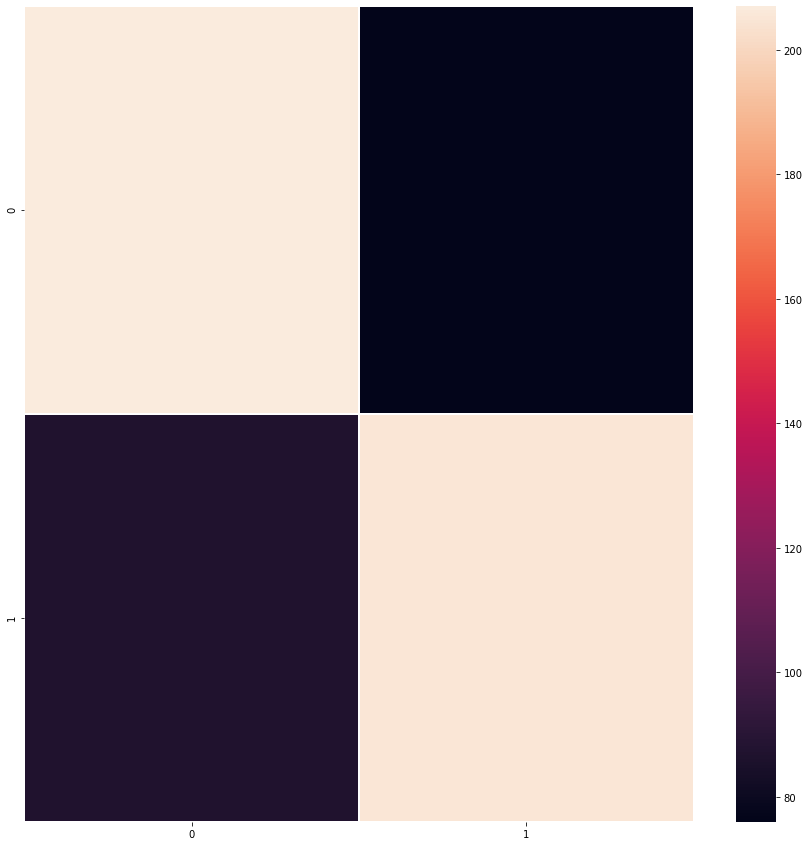

catboost Acc :  0.7165217391304348


In [167]:
from catboost import CatBoostClassifier, Pool
from catboost.utils import get_confusion_matrix

eval_val = Pool(x_val,
               y_val)
eval_dataset = Pool(x_test,
                    y_test)

model = CatBoostClassifier(iterations=100,
                           #loss_function='CrossEntropy',
                           task_type="GPU",
                           devices='0-24')

model.fit(x_train,
          y_train,
          eval_set=eval_val,
          verbose=True)

print(model.get_best_score())
cm = get_confusion_matrix(model, eval_dataset)
print(cm)
predict_accuracy_on_test_set = (cm[0,0] + cm[1,1])/(cm[0,0] + cm[1,1]+cm[1,0] + cm[0,1])
ax = sns.heatmap(cm, linewidth=1)
plt.show()
print("catboost Acc : ", predict_accuracy_on_test_set)

<div class="alert alert-block alert-info">
Accuracy has gone down to 71%. It's still a high accuracy but now we can demonstrate that our model can't always know where the data came from

In [168]:
import shap
shap.initjs()

In [169]:
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(x_train)

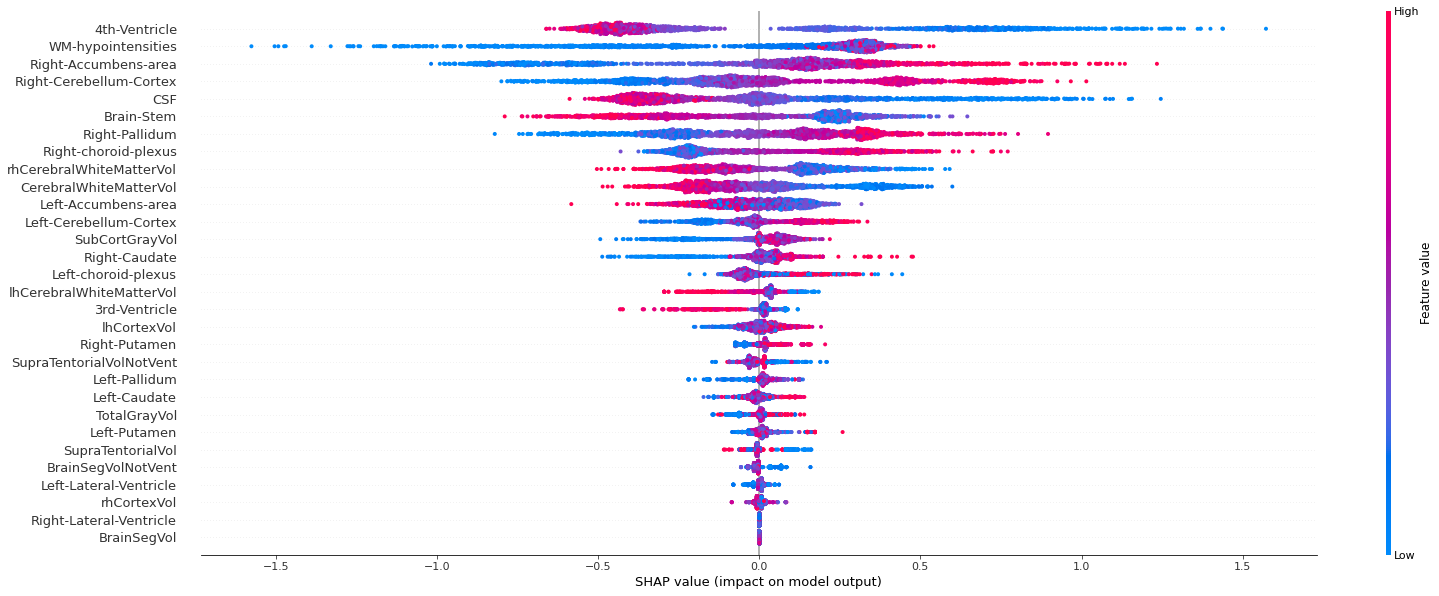

In [170]:
plt.figure(figsize=(15, 10))
#fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values, features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,plot_size=(25, 10),show=False, )
plt.savefig('MLshapCB.png')

In [171]:
shap_values.data

In [172]:
explainer = shap.Explainer(model, x_train)
shap_values = explainer(x_train)

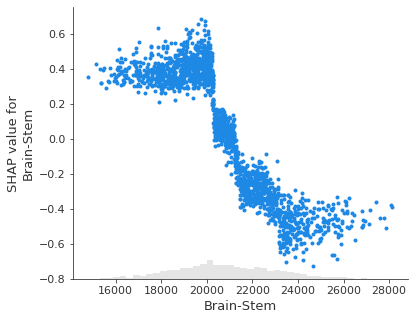

In [173]:
shap.plots.scatter(shap_values[:,"Brain-Stem"],show=False)
plt.savefig('Brain-Stem_ScatPlot.png')

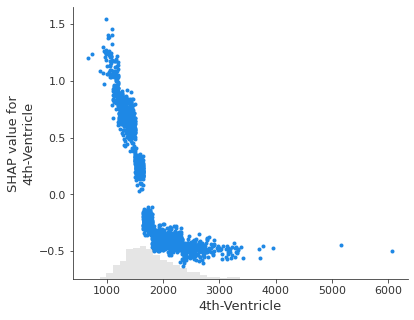

In [181]:
shap.plots.scatter(shap_values[:,"4th-Ventricle"],show=False,)
plt.savefig('4th-Ventricle_ScatPlot.png')

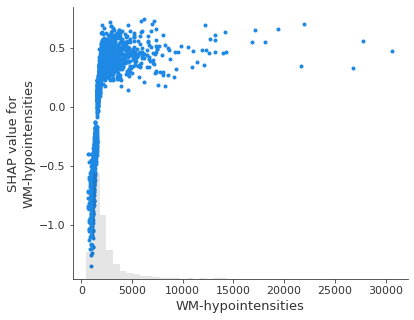

In [175]:
shap.plots.scatter(shap_values[:,"WM-hypointensities"],show=False)
plt.savefig('WM-hypointensities_ScatPlot.png')

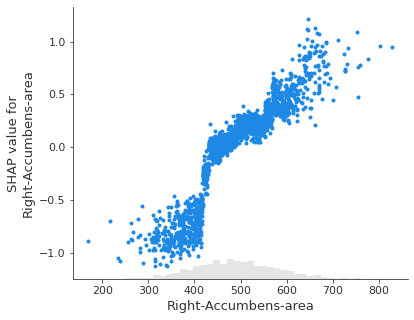

In [178]:
shap.plots.scatter(shap_values[:,"Right-Accumbens-area"],show=False,figsize = (10,10))
plt.savefig('Right-Accumbens-Area_ScatPlot.png')

<div class="alert alert-block alert-info">
The plot above sorts features by the sum of SHAP value magnitudes over all samples, and uses SHAP values to show the distribution of the impacts each feature has on the model output. The color represents the feature value (red high, blue low). This reveals for example that a low Left-VentralDC tends the output to be 1 (FreeSurfer7)

In [26]:
shap.force_plot(explainer.expected_value, shap_values, x_train)

## Random Forest

In [182]:
y = concat_df.Software
x = concat_df.drop(columns=['Software','CC_Anterior',
                            'CC_Central','CC_Mid_Anterior','CC_Mid_Posterior',
                            'CC_Posterior','Left-Inf-Lat-Vent','Left-VentralDC',
                            'MaskVol','Right-Inf-Lat-Vent','Right-VentralDC','Left-Hippocampus',
                            'Right-Hippocampus','Right-Cerebellum-White-Matter','Left-Cerebellum-White-Matter',
                            'Right-Amygdala','Left-Amygdala',
                            '5th-Ventricle','Left-WM-hypointensities', 
                            'Left-non-WM-hypointensities','Left-vessel','Optic-Chiasm',
                            'Right-WM-hypointensities','Right-non-WM-hypointensities',
                            'Right-vessel','non-WM-hypointensities'])

In [183]:
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42,shuffle=True)

In [184]:
from sklearn.ensemble import RandomForestClassifier

forest = RandomForestClassifier(random_state = 1)

<div class="alert alert-block alert-info">
First, we will make hyperparameter tuning in order to find the best hyperparameters for the model

In [185]:
from sklearn.model_selection import GridSearchCV

n_estimators = [100, 300, 500, 800, 1200]
max_depth = [5, 8, 15, 25, 30]
min_samples_split = [2, 5, 10, 15, 100]
min_samples_leaf = [1, 2, 5, 10] 

hyperF = dict(n_estimators = n_estimators, max_depth = max_depth,  
              min_samples_split = min_samples_split, 
             min_samples_leaf = min_samples_leaf)

gridF = GridSearchCV(forest, hyperF, cv = 3, verbose = 1, 
                      n_jobs = -1)
bestF = gridF.fit(x_train, y_train)

Fitting 3 folds for each of 500 candidates, totalling 1500 fits


In [186]:
print(bestF.best_params_)

{'max_depth': 25, 'min_samples_leaf': 10, 'min_samples_split': 2, 'n_estimators': 300}


<div class="alert alert-block alert-info">
Once we've found the best parameter, we introduce them into the model

In [187]:
forestOpt = RandomForestClassifier(random_state = 3, max_depth = 25,
                                   n_estimators = 300, min_samples_split = 2, 
                                   min_samples_leaf = 10)

In [193]:
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
modelOpt = forestOpt.fit(x_train, y_train)
y_pred = modelOpt.predict(x_test)
cm = confusion_matrix(y_test,y_pred)
print(cm)
accuracy_score(y_test,y_pred)
print(accuracy_score)

[[204  79]
 [ 79 213]]
<function accuracy_score at 0x7f6bd7c74550>


<div class="alert alert-block alert-info">
Random Forest Classifier with hyperparameter tuning offers 88% accuracy, a result similar to the one obtained with CatBoost Classifier

In [189]:
import shap
shap.initjs()

In [190]:
explainer = shap.TreeExplainer(modelOpt)
shap_values = explainer.shap_values(x_train)

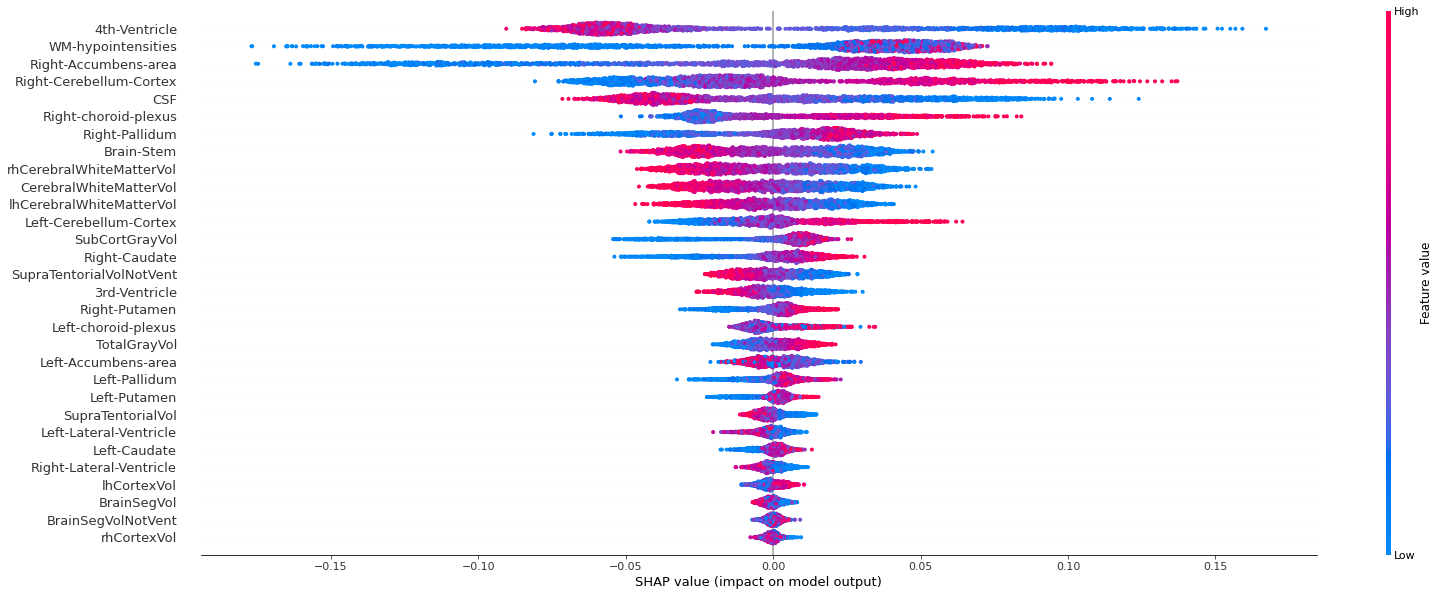

In [195]:
plt.figure(figsize=(15, 10))
#fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values[1], features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,plot_size=(25, 10),show=False, )

plt.savefig('MLshapRF.png')

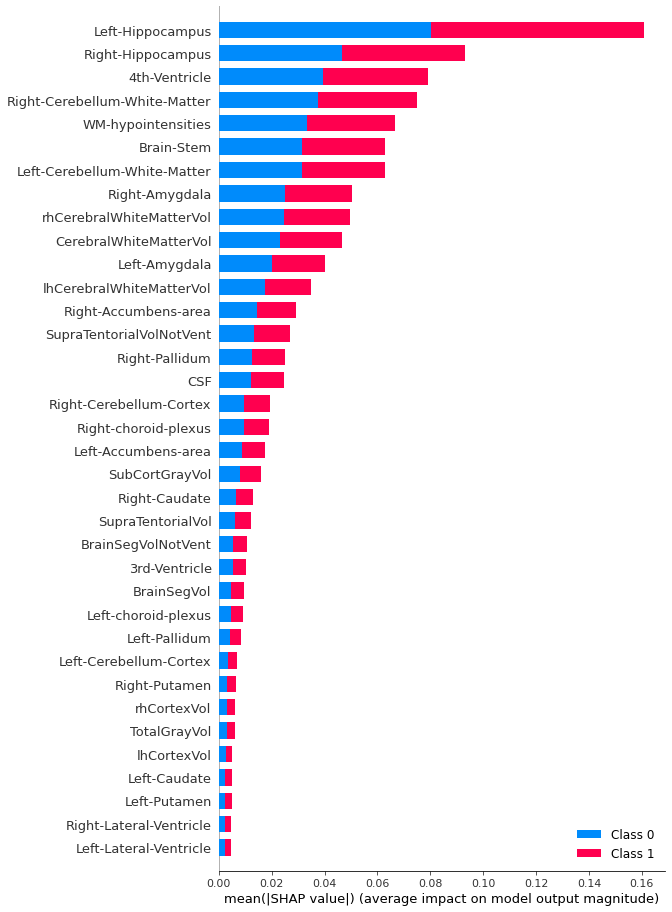

In [37]:
fig, ax = plt.subplots(figsize=(40, 40))
shap.summary_plot(shap_values, features = x_train,max_display=len(x_train.columns), feature_names=x_train.columns,show=False, )


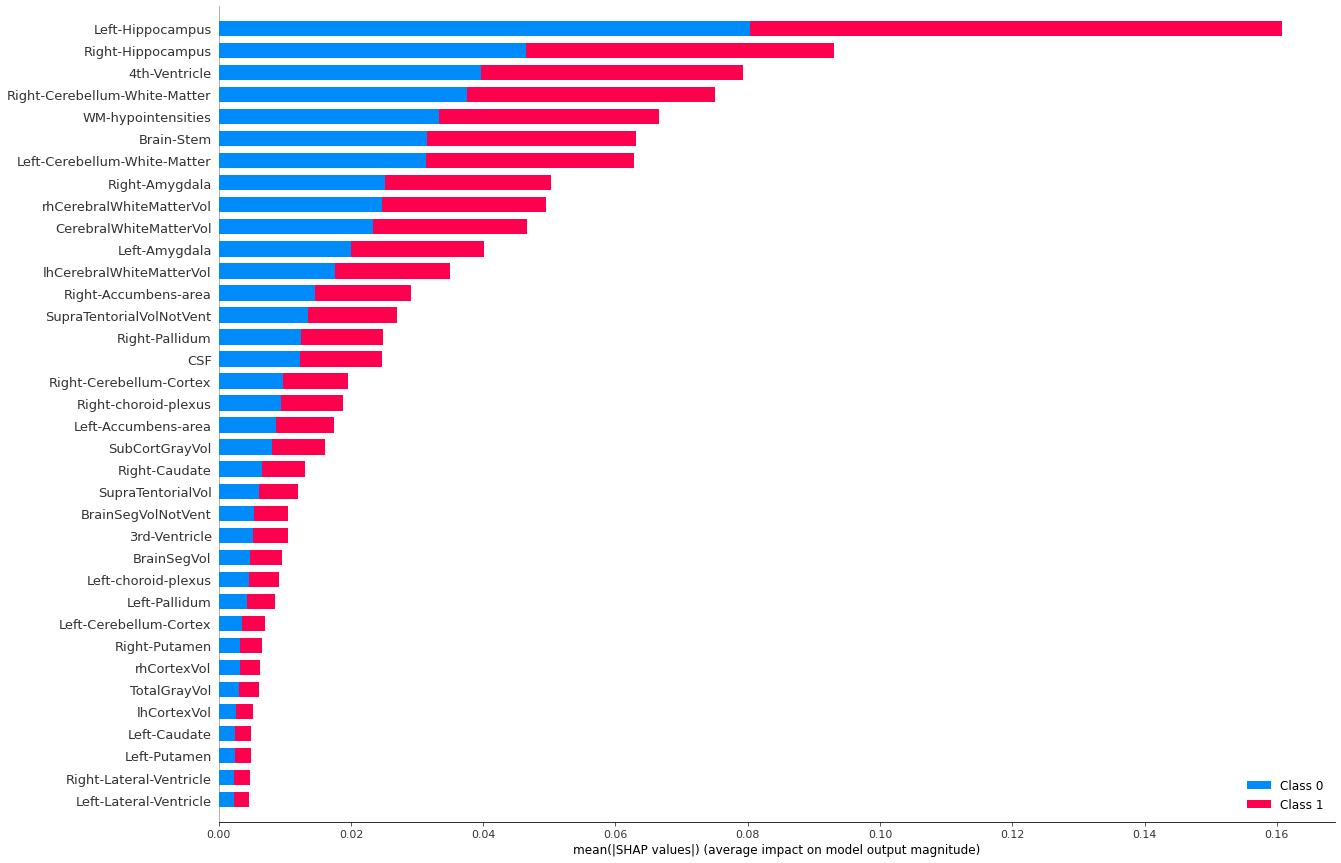

In [38]:
plt.figure(figsize=(20, 15))
shap.summary_plot(shap_values, features = x_train,
max_display=len(x_train.columns),
plot_type="bar",
plot_size=(20, 15), show=False)
plt.xlabel('mean(|SHAP values|) (average impact on model output magnitude)',fontsize=12)
plt.savefig('MLplot.png')